# MIS325 Midterm Exam: Regression with Feature Comparison

- Mert İlhan Ecevit

This midterm exam focuses on predicting network latency using Linear Regression models. You will preprocess the dataset, perform exploratory data analysis, and compare two Linear Regression models:
1. A model trained on **all features**.
2. A model trained on a **selected subset of features**.

### Objectives
- Preprocess the data to handle missing values, duplicates, and outliers.
- Perform exploratory data analysis to understand feature relationships.
- Select important features using correlation-based analysis.
- Split the dataset for training and testing with two feature sets.
- Train and evaluate Linear Regression models for both feature sets.
- Compare the results to evaluate the impact of feature selection.

### Dataset Information
- **Packet_Size**: Size of data packets in bytes.
- **Traffic_Volume**: Amount of network traffic in MB.
- **Port**: Network port used.
- **Hour**: Hour of the day the traffic was recorded.
- **Latency**: Target variable (latency in milliseconds).

Submit your notebook named as "yourname_lastname_midterm.ipynb".


## Step 1: Load the Dataset (10 Points)

In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data=pd.read_csv("/content/cleaned_regression_midterm_data.csv")

# Display dataset information
print(data)

# Display the first few rows
df = pd.DataFrame(data)
df.head()

     Packet_Size  Traffic_Volume  Port  Hour     Latency
0     601.839611      698.161714    80    15  244.351492
1    1429.225744      536.096366   443     1  230.025897
2    1115.143300      309.527616  8080     5  144.710348
3     923.673583      813.795020   443    20  291.469654
4     288.042768      684.731173  8080    11  214.768520
..           ...             ...   ...   ...         ...
505   288.008131      162.616939   443     4   60.849570
506   147.408067      910.927184   443     1  282.806700
507  1307.828945      822.537243  8080    15  312.014267
508   927.201157      949.799913    80     4  343.118199
509  1080.792222      725.719508    80    14  273.862261

[510 rows x 5 columns]


,Packet_Size,Traffic_Volume,Port,Hour,Latency
0,601.839611,698.161714,80,15,244.351492
1,1429.225744,536.096366,443,1,230.025897
2,1115.143300,309.527616,8080,5,144.710348
3,923.673583,813.795020,443,20,291.469654
4,288.042768,684.731173,8080,11,214.768520


## Step 2: Preprocessing (20 points)

In [31]:
# Handle missing values
print(df.isnull().sum())
# Fill missing values in numeric columns with the median
df_median_imputed = df.copy()
df_median_imputed['Packet_Size'].fillna(df_median_imputed['Packet_Size'].median(), inplace=True)
print("Missing values in the dataset:\n", df_median_imputed.isnull().sum())

# Remove duplicate rows
df.drop_duplicates()

# Confirm no missing values remain
df.isnull()==0

# Display cleaned dataset info
print(df)


Packet_Size       20
Traffic_Volume     0
Port               0
Hour               0
Latency            0
dtype: int64
Missing values in the dataset:
 Packet_Size       0
Traffic_Volume    0
Port              0
Hour              0
Latency           0
dtype: int64
     Packet_Size  Traffic_Volume  Port  Hour     Latency
0     601.839611      698.161714    80    15  244.351492
1    1429.225744      536.096366   443     1  230.025897
2    1115.143300      309.527616  8080     5  144.710348
3     923.673583      813.795020   443    20  291.469654
4     288.042768      684.731173  8080    11  214.768520
..           ...             ...   ...   ...         ...
505   288.008131      162.616939   443     4   60.849570
506   147.408067      910.927184   443     1  282.806700
507  1307.828945      822.537243  8080    15  312.014267
508   927.201157      949.799913    80     4  343.118199
509  1080.792222      725.719508    80    14  273.862261

[510 rows x 5 columns]


<ipython-input-31-9e403aba38a2>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_median_imputed['Packet_Size'].fillna(df_median_imputed['Packet_Size'].median(), inplace=True)


## Step 3: Exploratory Data Analysis (EDA) (15 points)

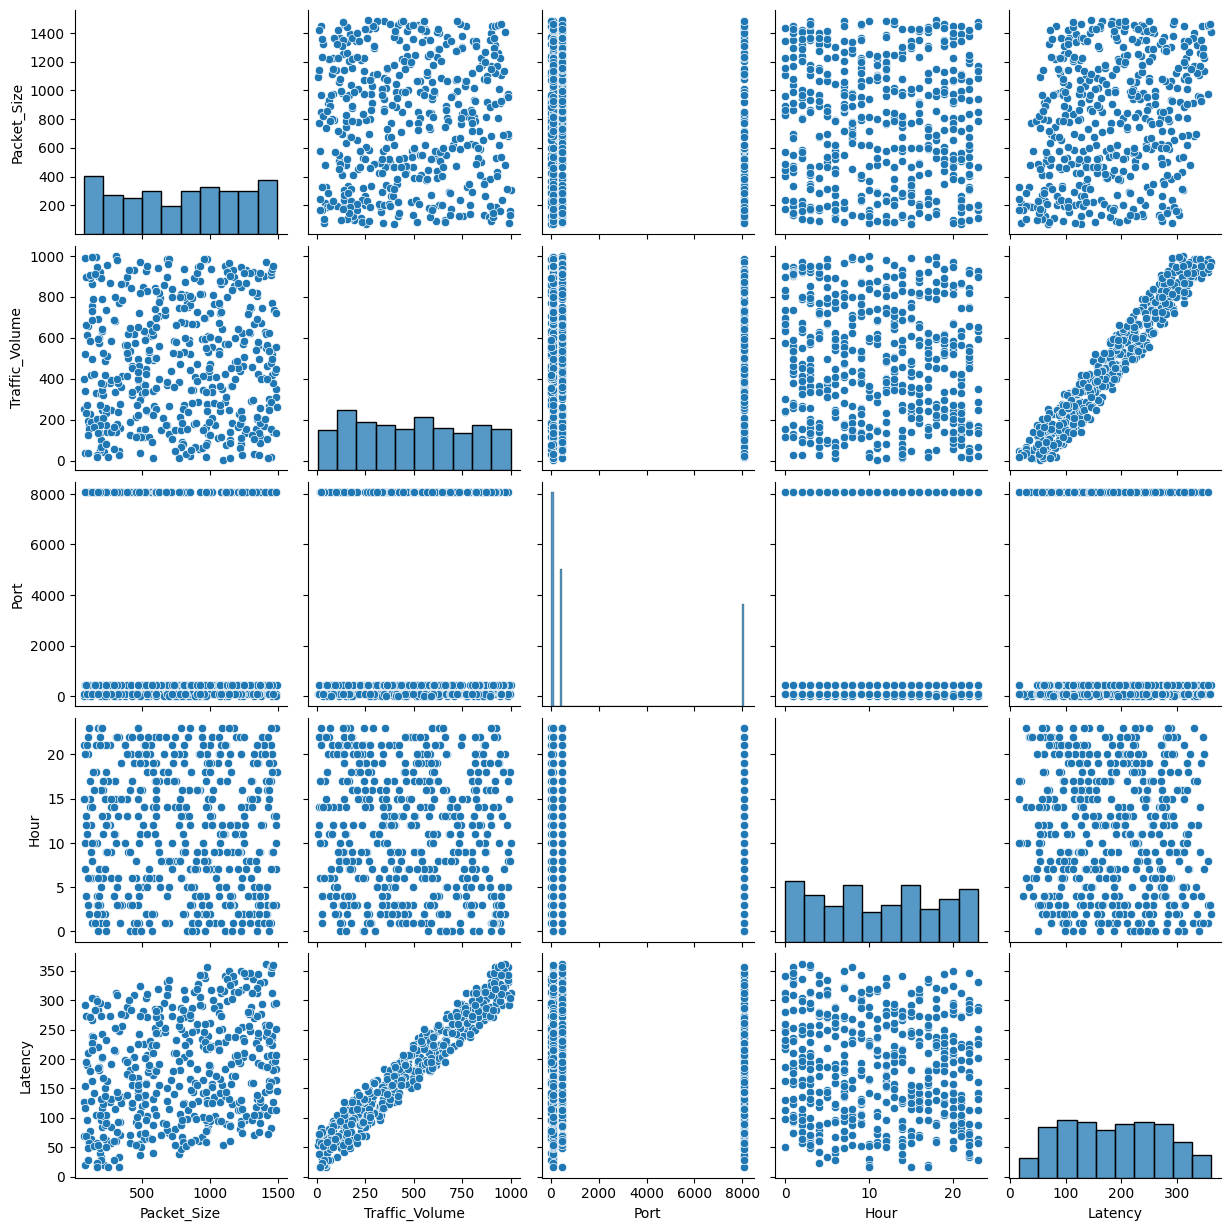

<Axes: >

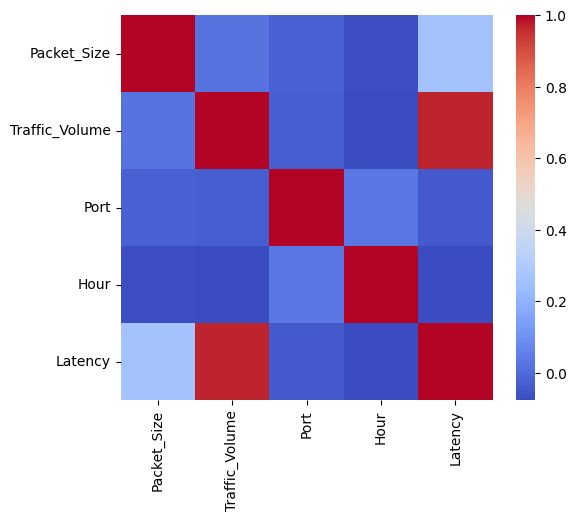

In [36]:

# Visualize the distribution of Latency
sns.pairplot(df[['Packet_Size', 'Traffic_Volume', 'Port', 'Hour', 'Latency']])
plt.show()
#we can say that there is a positive correlation between Latency and Traffic_Volume

# Correlation heatmap
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), cmap='coolwarm')


## Step 4: Feature Selection (20 points)

In [40]:
# Correlation analysis
matrix = df.corr()
print(matrix)

# Selecting features with high correlation to the target (Latency)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target variable
X = df.drop('Latency', axis=1)
y = df['Latency']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



                Packet_Size  Traffic_Volume      Port      Hour   Latency
Packet_Size        1.000000        0.020224 -0.022163 -0.069374  0.260917
Traffic_Volume     0.020224        1.000000 -0.033981 -0.076794  0.968075
Port              -0.022163       -0.033981  1.000000  0.036605 -0.039502
Hour              -0.069374       -0.076794  0.036605  1.000000 -0.076124
Latency            0.260917        0.968075 -0.039502 -0.076124  1.000000


## Step 5: Model Training and Evaluation (30 points)

In [58]:
# Define the target variable
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
X = df.drop('Latency', axis=1)
y = df['Latency']

# Split data using dynamically selected features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Split data with all features for comparison
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate Linear Regression with all features
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression

lin_reg.fit(X_train, y_train)


# Train and evaluate Linear Regression with selected features

from sklearn.metrics import mean_squared_error, r2_score
lin_reg.fit(X_train, y_train)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'

## Step 6: Conclusion and Discussion (5 Points)

### Questions
1. Which model performed better?
2. Why might the model with selected features perform differently than the one with all features?
3. Reflect on the importance of feature selection in regression modeling.
